In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [5]:
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [6]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

0


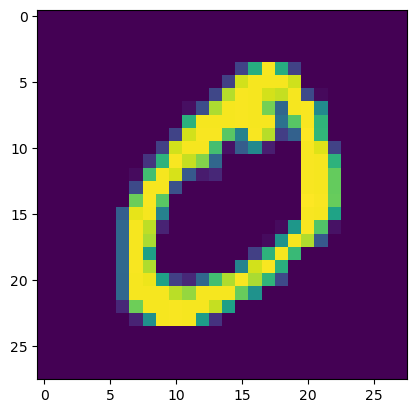

In [8]:
plt.imshow(X_train[1])
print(y_train[1])

In [9]:
X_train=X_train/255
x_test=x_test/255   # for featurescaling betweeem 0-1

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model= Sequential() 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


In [23]:
import keras_tuner as kt

In [13]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    
    # Tune the activation function for the first Dense layer
    hp_activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])

    model.add(layers.Dense(units=hp_units, activation=hp_activation))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [19]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    directory='hyperparameter_tuning',
    project_name='mnist_tuning'
)

# Define the training data (replace this with your actual data)


In [21]:
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

# Print trials information
tuner.results_summary()


Trial 20 Complete [00h 00m 38s]
val_accuracy: 0.9754999876022339

Best val_accuracy So Far: 0.9754999876022339
Total elapsed time: 00h 13m 17s
Results summary
Results in hyperparameter_tuning\mnist_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 19 summary
Hyperparameters:
units: 128
activation: relu
learning_rate: 0.001
Score: 0.9754999876022339

Trial 07 summary
Hyperparameters:
units: 224
activation: relu
learning_rate: 0.001
Score: 0.9754166603088379

Trial 03 summary
Hyperparameters:
units: 160
activation: relu
learning_rate: 0.001
Score: 0.9743333458900452

Trial 01 summary
Hyperparameters:
units: 256
activation: tanh
learning_rate: 0.001
Score: 0.9731666445732117

Trial 06 summary
Hyperparameters:
units: 160
activation: tanh
learning_rate: 0.001
Score: 0.9710833430290222

Trial 16 summary
Hyperparameters:
units: 96
activation: tanh
learning_rate: 0.001
Score: 0.9708333611488342

Trial 17 summary
Hyperparameters:
units: 192
activation: sigmoid

In [34]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [35]:
tuner.search(X_train,y_train,epochs=5, validation_data=(x_test,y_test))

In [36]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [41]:

# Perform hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Now you can call model.summary()
model.summary()

# Train the model with the best hyperparameters
model.fit(train_images, train_labels, epochs=10, verbose=1, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3031 - accuracy: 0.9102 - val_loss: 0.2505 - val_accuracy: 0.9267
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2137 - accuracy: 0.9373 - val_loss: 0.1948 - val_accuracy: 0.9442
Epoch 3/10
1500/1500 [====

In [42]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,verbose=1,validation_data=(x_test,y_test))

Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1486 - accuracy: 0.9584 - val_loss: 0.1963 - val_accuracy: 0.9535
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9601 - val_loss: 0.2035 - val_accuracy: 0.9523
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1359 - accuracy: 0.9615 - val_loss: 0.2100 - val_accuracy: 0.9527
Epoch 10/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1329 - accuracy: 0.9620 - val_loss: 0.2021 - val_accuracy: 0.9552
Epoch 11/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1288 - accuracy: 0.9627 - val_loss: 0.2240 - val_accuracy: 0.9500
Epoch 12/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1246 - accuracy: 0.9639 - val_loss: 0.2352 - val_accuracy: 0.9487
Epoch 13/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1255 - accuracy: 0.9637 - val_loss: 0.2495 - va

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0251 - val_accuracy: 0.9926
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0231 - val_accuracy: 0.9929
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0218 - val_accuracy: 0.9936
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0225 - val_accuracy: 0.9930
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.0203 - val_accuracy: 0.9933
Epoch 

In [46]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7223 - accuracy: 0.9565


[0.7223414182662964, 0.9564999938011169]

In [49]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


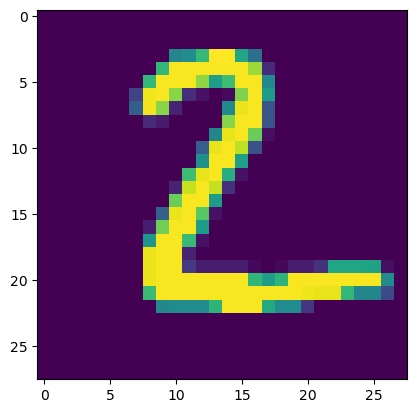

In [52]:
plt.imshow(x_test[1])